In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

=================================================================================================================
# Neural Networks in Practice: scikit-learn


##### D.Vidotto, Data Mining: JBI030 2019/2020


=================================================================================================================


In this notebook, we are going to see how to setup and train Feedforward Neural Networks with scikit-learn. For this purpose, we are going to explore the usage of two functions from the `neural_network` module: [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In this notebook we will go through the same examples of the notebook dedicated to Keras. Since we are already familiar with scikit-learn, we will have simply have a quick overview of their Neural Network implementations. 

Here, we will go through the following examples:

1. Regression 
1. Classification
  * Binary Classification
  * Multiclass Classification
1. cross-validation with the Heart Dataset

## 1. Regression
For the regression example, we will use the [Boston Houses dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). The data contains contains information collected by the U.S Census Service concerning housing in Boston; the sample size is 506, and there are 13 features. The target variable is the median value of houses in different areas of Boston. More information about the dataset can be found [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Let's load the data: 

In [2]:
from sklearn.datasets import load_boston
bunch_data = load_boston()
bunch_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Feature names 
bunch_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X, y = bunch_data.data, bunch_data.target
X.shape

(506, 13)

**Some preprocessing**...

In [5]:
# Train-test split (separate 10% of the data for the test set - we won't use a separate validation set here)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [6]:
X_train[:5]

array([[1.0290e-01, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01,
        6.3580e+00, 5.2900e+01, 7.0355e+00, 6.0000e+00, 3.0000e+02,
        1.6600e+01, 3.7275e+02, 1.1220e+01],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9412e+02, 5.2100e+00],
       [2.3004e+00, 0.0000e+00, 1.9580e+01, 0.0000e+00, 6.0500e-01,
        6.3190e+00, 9.6100e+01, 2.1000e+00, 5.0000e+00, 4.0300e+02,
        1.4700e+01, 2.9709e+02, 1.1100e+01],
       [2.0746e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01,
        5.0930e+00, 9.8000e+01, 1.8226e+00, 4.0000e+00, 7.1100e+02,
        2.0100e+01, 3.1843e+02, 2.9680e+01],
       [1.1027e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01,
        6.4560e+00, 6.7800e+01, 7.2255e+00, 8.0000e+00, 2.8400e+02,
        1.9700e+01, 3.9690e+02, 6.7300e+00]])

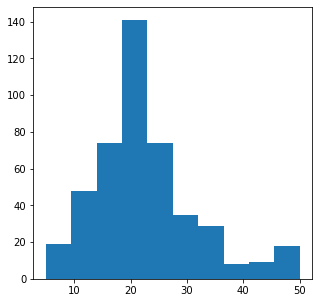

In [7]:
# Histogram of the target
plt.figure(figsize=(5,5))
plt.hist(y_train)
plt.show()

In [8]:
# Rescale data with min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled =mms.transform(X_test)

**Setting the Regression FNN**. We are now going to use Keras to set up a Regression NN. Let's review the components of a Regression network: 
* the input layer contains as many neurons as the number of features
* as we are predicting just one continuous output, we can set up the network with one output layer
* the loss function is the mean squared error 
* no activation function is used for the output layer

Here, we are going to build a Neural Network with the following characteristics: 
* 5 neurons in the first hidden layer (`hidden_layer_sizes` which takes a tuple with the number of neurons as input)
* ReLU activation function for the hidden layer (`activation='relu'`)
* early stopping (`early_stopping=True`)
    * training will be stopped if there is no improvement on the validation set for 10 iterations  (`n_iter_no_change=10`)
* a maximum number of 1000 epochs (`max_iter=1000`)
* SGD (`solver='sgd'`) with momentum optimizer with:
    * batch size = 32 (`batch_size=32`) 
    * constant learning rate = 0.001 (`learning_rate_init=0.001`)
    * momentum = 0.9 (`momentum=0.9`)
* $l_2$ with penalty = 0.001 (`alpha=0.001`)

Furthrermore, we will also set `validation_fraction=0.1` to evaluate the early stopping, and `random_state=1` for reproducibility. Last, note that MLPRegressor uses already the squared error as a loss function. 

In [9]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(5, ), 
                     activation='relu', 
                     solver='sgd', 
                     alpha=0.001, 
                     batch_size=32, 
                     learning_rate='constant', 
                     learning_rate_init=0.001, 
                     max_iter=1000, 
                     random_state=1, 
                     tol=0.0001,   # the tolerance criterion for the optimization algorithm
                     verbose=False, 
                     momentum=0.9, 
                     early_stopping=True, 
                     validation_fraction=0.1, 
                     n_iter_no_change=10)

We will only train networks with one layer in this example; if you want to add layers with a specific number of neurons you can just insert other values in the ` hidden_layer_size` argument; for example, to have two hidden layers with 5 and 4 neurons respectively, you can set: 

```python
hidden_layer_size = (5, 4, )
```

Let's go back to our single-layer model, and train it: 

In [10]:
model.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size=32, beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(5,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Let's check the model estimates first. The weights of the first hidden layers are:

In [11]:
model.coefs_[0]    # shape = n. inputs x n. neurons

array([[-0.09603048,  0.22989646, -0.57706882, -1.58376335, -0.39085469],
       [-0.47060502, -0.39892824, -0.17828496,  0.56280347,  0.0050342 ],
       [-0.09726905, -0.04002049, -0.34118083,  0.37832569, -0.65892536],
       [ 0.1906156 , -0.12020428,  0.06775164,  0.56555095, -0.35850449],
       [ 0.34297502,  0.304535  , -0.21538345, -1.12516912,  0.47638559],
       [ 0.44932352, -0.7900406 , -0.53211595,  3.13195256,  2.54304055],
       [-0.46875472, -0.51633007,  0.52858846, -0.0676868 , -0.08141338],
       [-0.21340524,  0.09357604,  0.38629245, -2.04612217, -0.4292811 ],
       [ 0.5581062 ,  0.02982997, -0.25345583,  1.00644459, -0.34184823],
       [-0.06583269,  0.19399651, -0.23825218, -0.8985927 , -0.84688964],
       [-0.55987902, -0.17907106, -0.332897  , -1.10194343, -1.01758611],
       [-0.52116395, -0.45212288, -0.40781714,  0.88484004,  0.07991964],
       [-0.45965152, -0.27862171,  0.22441587, -3.59041253, -1.53614447]])

While the weights of the output layers: 

In [12]:
model.coefs_[1]

array([[ 0.80623153],
       [-0.32857698],
       [-0.7212606 ],
       [ 5.63707697],
       [ 3.17262482]])

The intercepts of the hidden and output layer:

In [13]:
model.intercepts_

[array([ 0.03527594, -0.42069774,  0.01719247,  3.41236003, -0.02724533]),
 array([2.64637129])]

We can assess the convergence of the loss as follows: 

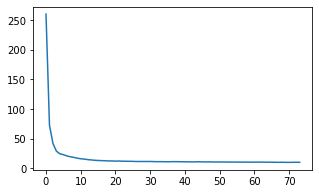

In [14]:
plt.figure(figsize=(5,3))
plt.plot(model.loss_curve_)
plt.show()

With `n_iter` you can check if and when early stopping terminated the computations: 

In [15]:
model.n_iter_

74

With `loss_` we can obtain the value of the loss function:

In [16]:
model.loss_

10.246038492810406

The model seems to have converged. Let's now assess model predictions and performance. Let's predict the value of the first five test units: 

In [17]:
y_pred = model.predict(X_test_scaled[:5])
y_pred

array([31.41147816, 26.80401856, 16.73545148, 21.00468812, 18.65367359])

And, last, let's check the MSE on the test set: 

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model.predict(X_test_scaled), y_test)

15.045212757099515

## 2. Classification
### 2.1 Binary Classification
For the binary classification case, we use the "circles" dataset already encountered with kernel SVM's. Let's load it and view it again: 

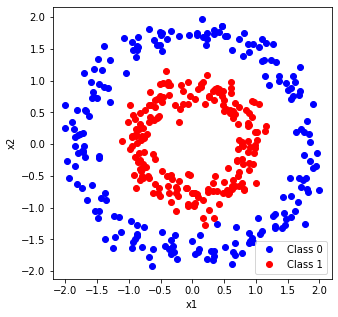

In [19]:
from sklearn.preprocessing import StandardScaler
data_lin_sep_svm = pd.read_csv("./data/neural_networks/circles.csv")
X = data_lin_sep_svm.iloc[:,:2]
y = data_lin_sep_svm["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

plt.figure(figsize=(5,5))
plt.plot(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], "bo", label="Class 0")
plt.plot(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], "ro", label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

**Setting Up the network**. Let's review the ingredients of a Neural Network for binary classification: 
* a single output layer 
* cross-entropy for binary classification
* sigmoid activation function for the output layer

Since the classification taks is highly non-linear in this case, we use as an example a network with one hidden layer,  containing 15 neurons (and ReLU activation function). The other characteristics of the network we are going to build are the following ones: 
* ReLU activation function for the hidden layer (`activation='relu'`)
* early stopping (`early_stopping=True` with max. 100 iterations without improvement on the validation set)
* a maximum number of 2000 epochs (`max_iter=2000`)
* SGD (`solver='sgd'`) with momentum optimizer with:
    * batch size = 10 (`batch_size=64`) 
    * starting learning rate = 0.5 (`learning_rate_init=0.5`) with power scheduling (`learning_rate=invscaling` and `power_t=0.5`)
    * momentum = 0.9 (`momentum=0.9`)
* no $l_2$ penalty (`alpha=0`)

As done in the regression example, we set `validation_fraction=0.1` to evaluate early stopping, and `random_state=1` for reproducibility. Last, note that MLPClassifier [uses the cross-entropy](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification) as a loss function, and it automatically sets the `sigmoid` as the activation of the output layer. 

In [20]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(15, ), 
                     activation='relu', 
                     solver='sgd', 
                     alpha=0, 
                     batch_size=64, 
                     learning_rate='invscaling', 
                     learning_rate_init=0.5,
                     power_t=0.5,                      
                     max_iter=2000, 
                     random_state=1, 
                     tol=0.0001,   # the tolerance criterion for the optimization algorithm
                     verbose=False, 
                     momentum=0.9, 
                     early_stopping=True, 
                     validation_fraction=0.1, 
                     n_iter_no_change=500)

Let's now perform training: 

In [21]:
model.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='invscaling',
              learning_rate_init=0.5, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

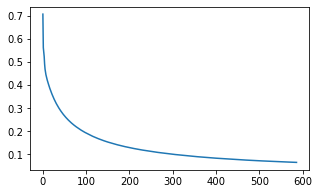

In [22]:
plt.figure(figsize=(5,3))
plt.plot(model.loss_curve_)
plt.show()

SGD has used early stopping to terminate:

In [23]:
model.n_iter_

587

The predicted probabilities of the first five test units: 

In [24]:
model.predict_proba(X_test_scaled[:5])

array([[0.69870168, 0.30129832],
       [0.30290545, 0.69709455],
       [0.88417554, 0.11582446],
       [0.36950992, 0.63049008],
       [0.21821887, 0.78178113]])

And their predicted classes:

In [25]:
model.predict(X_test_scaled[:5])

array([0, 1, 0, 1, 1], dtype=int64)

In [26]:
model.score(X_test_scaled, y_test)

1.0

Last, let's check plot the model decision boundary: 

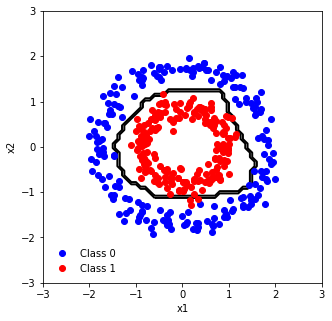

In [27]:
xx, yy = np.meshgrid(np.arange(X_train_scaled[:,0].min(), X_train_scaled[:,0].max(), 0.1),
                     np.arange(X_train_scaled[:,1].min(), X_train_scaled[:,1].max(), 0.1))
zz = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)


plt.figure(figsize=(5,5))
contour = plt.contour(xx, yy, zz, levels=1, alpha=1., vmin=0, vmax=1, linewidths=2, colors='k', linestyles='-')
plt.plot(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], "bo", label="Class 0")
plt.plot(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], "ro", label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.legend(loc=3,  frameon=False)
plt.show()

### 2.2 Multiclass Classification
For the multiclass case, we see an example with the *iris dataset*. Unlike what done with other algorithms, however, this time we will use the dataset with all 4 original features. 

In [28]:
from sklearn.datasets import load_iris 
X, y = load_iris(return_X_y=True)

scikit-learn takes care internally (before training) of the encoding of the target variable, and so we don't need to perform one-hot encoding manually.

Let's now split the train/test set and standardize the features:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=1)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**The network**. In the multiclass case, a typical FNN has the following architecture: 
* as many output layers as there are classes (3 in this case)
* cross-entropy loss 
* softmax activation function for the output layer

We are going to create a netwrk with the following characteristics: 
* sigmoid activation function for the hidden layer (`activation='logistic'`)
* early stopping (`early_stopping=True` with max. 1000 iterations without improvement on the validation set)
* a maximum number of 2000 epochs (`max_iter=2000`)
* ADAM (`solver='adam'`) with:
    * batch size = 15 (`batch_size=15`) 
    * starting learning rate = 0.001 (`learning_rate_init=0.001`) 
    * decay of first moment = 0.9 (`beta_1=0.9`)
    * decay of second moment = 0.999 (`beta_2=0.999`)
    * numerical stability parameter = 1e-8 (epsilon=1e-8)
* $l_2$ penalty (`alpha=0.001`)

As usualy, we set `validation_fraction=0.1` to evaluate early stopping, and `random_state=1` for reproducibility. MLPClassifier  automatically sets the `softmax` as the activation of the output layer in the multi-class case.

In [30]:
model = MLPClassifier(hidden_layer_sizes=(15, ), 
                     activation='logistic', 
                     solver='adam',
                     beta_1=0.9, 
                     beta_2=0.999,
                     epsilon=1e-8,
                     alpha=0.0001, 
                     batch_size=15, 
                     learning_rate_init=0.001,                  
                     max_iter=2000, 
                     random_state=1, 
                     tol=0.001,   # the tolerance criterion for the optimization algorithm
                     verbose=False, 
                     early_stopping=True, 
                     validation_fraction=0.1, 
                     n_iter_no_change=1000)

Let's now train the model: 

In [31]:
model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=15, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=1000, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

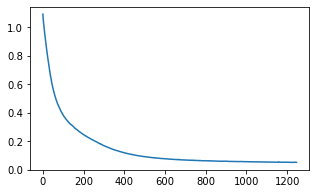

In [32]:
plt.figure(figsize=(5,3))
plt.plot(model.loss_curve_)
plt.show()

The algorithm seems to have converged. Let's assess the predictions of the first ten test units:

In [33]:
# Probabilities
model.predict_proba(X_test_scaled[:10])

array([[1.06137653e-02, 8.94082281e-01, 9.53039541e-02],
       [1.24957860e-01, 8.68238360e-01, 6.80377961e-03],
       [1.94671713e-03, 5.38950228e-01, 4.59103055e-01],
       [9.74173103e-01, 2.57784764e-02, 4.84202629e-05],
       [8.55910563e-03, 9.45845784e-01, 4.55951101e-02],
       [9.43189855e-01, 5.67566377e-02, 5.35070347e-05],
       [9.69202130e-01, 3.07095639e-02, 8.83060499e-05],
       [5.55676110e-04, 1.24505831e-01, 8.74938493e-01],
       [2.33373492e-02, 4.80090611e-01, 4.96572040e-01],
       [2.14974750e-03, 1.47385879e-01, 8.50464373e-01]])

In [34]:
# Predicted Classes
model.predict(X_test_scaled[:10])

array([1, 1, 1, 0, 1, 0, 0, 2, 2, 2])

Test set accuracy:

In [35]:
model.score(X_test_scaled, y_test)

0.8

## 3. Cross-Validation with the Heart Dataset

We are now going to perform tuning with cross-validation using the Heart data. Let's first load the dataset:

In [36]:
data_train = pd.read_csv("./data/heart_data/heart_train_processed.csv")
data_test = pd.read_csv("./data/heart_data/heart_test_processed.csv")
X_train = data_train.drop("y", axis=1)
X_test = data_test.drop("y", axis=1)
y_train = data_train["y"]
y_test = data_test["y"]

Given the large number of hyperparameters that need to be optimized, we will use random search, rather than Grid Search (which is nonetheless still possible, if you prefer manually specify a grid of value). As it is highly unlikely to find the best setting for a Neural Network with just grid/randomized search methods, a good tip would be to use these methodologies to find a good initial setting for (some of) the hyperparameters, and then manually refine these (and other) hyperparameter values, with a validation set. Moreover, for large datasets tuning a Neural Network with cross-validation is not recommended given the large computational costs involved in this operation. 

The ranodmized tuning will occur on a single-layer network (remember: networks with a single layers are universal approximators, as long as they have a sufficiently large enough number of neurons), and the hyperparameters will be tuned as follows: 
* we will choose between 1 and 20 neurons in the hidden layer from a uniform distribution in this range
* we will use a [reciprocal distribution](https://en.wikipedia.org/wiki/Reciprocal_distribution) for the learning rate of SGD; this distribution will range between 1e-4 and 0.99, giving larger probabilities to smaller values
* we will search how many optimal iterations to wait before stopping the algorithm (between 50, 100, 500, 1000, and 2000)
* we will choose between SGD and ADAM optimizer

The search will occur across 10 iterations (of course, in more intensive analyses you should increase such number). Let's initialize the random grid: 

In [37]:
from scipy.stats import reciprocal    # Reciprocal distribution in scipy.stats
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "hidden_layer_sizes": [i for i in range(1, 20)],
    "learning_rate_init": reciprocal(1e-4, 9e-1),
    "n_iter_no_change": [50, 100, 500, 1000, 2000],
    "solver" : ["sgd", "adam"]
}

Now we are ready to perform cross-validation (we will use 3-fold CV; the maximum number of epochs for the neural network is set equal to 10000): 

In [38]:
rnd_search_cv = RandomizedSearchCV(MLPClassifier(max_iter=int(1e+4), random_state=1), 
                                   param_distribs, n_iter=10, cv=3, n_jobs=-1, iid=False, random_state=1, 
                                  verbose=1)
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.9s finished
c:\users\u1253415\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=10000,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rand...
                   iid=False, n_iter=10, n_jobs=-1,
                   param_distributions={'hidden_layer_sizes': [1, 2, 3, 4, 5, 6,
                                              

The best set of hyperparameters was: 

In [39]:
rnd_search_cv.best_params_

{'hidden_layer_sizes': 10,
 'learning_rate_init': 0.0015685425729289283,
 'n_iter_no_change': 50,
 'solver': 'sgd'}

The CV accuracy:

In [40]:
rnd_search_cv.best_score_

0.8429526748971193

And the accuracy of the best model on the test set:

In [41]:
rnd_search_cv.score(X_test, y_test)

0.8360655737704918

Last, you can store the best model in a separate object, with the `best_estimator_.model` attribute:

In [42]:
model = rnd_search_cv.best_estimator_
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.0015685425729289283, max_fun=15000,
              max_iter=10000, momentum=0.9, n_iter_no_change=50,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)